In [1]:
import json
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
os.listdir('/content/gdrive/MyDrive/Covid_Project/Data/Raw_Data')

['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_vaccine_global.csv',
 'time_series_covid19_deaths_global.csv',
 'URLs_for_data.txt']

In [4]:
covid_confirmed_csv = '/content/gdrive/MyDrive/Covid_Project/Data/Raw_Data/time_series_covid19_confirmed_global.csv'

In [5]:
covid_confirmed_df = pd.read_csv(covid_confirmed_csv)

In [6]:
# Deleting unnecessary columns.
covid_confirmed_df.drop(['Province/State', 'Lat', 'Long'], inplace=True, axis=1)
covid_confirmed_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,137853,141489,142414,142414,143183,143439,143439,143439,144285,145008,145552,145996,146523,146523,146523,147985,148572,148933,149361,149810,149810,149810,150778,151013,151291,151563,151770
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310,133442,133591,133730,133912,133981,134201,134487,134761,135140
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724,178013,179216,180356,181376,182368,183347,184191,185042,185902
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797,14809,14836,14836,14836,14836,14873,14891,14908,14924
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158,43269,43487,43592,43662,43747,43890,43998,44174,44328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756,189066,193381,205656,215560,224894,232937,241543,246568,255748
275,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404,317534,317703,317703,317999,317999,318181,318435,319223,319646
276,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096,7104,7131,7131,7165,7187,7198,7213,7233,7256
277,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,184672,185649,186279,187602,

In [7]:
# Let's add the numbers for countries where data is for each region and not for full coutry. Example - Australia.
covid_confirmed_df = covid_confirmed_df.groupby('Country/Region', as_index=True).sum()

In [8]:
countries_in_df_confirmed = list(covid_confirmed_df.index)

# Clean the data

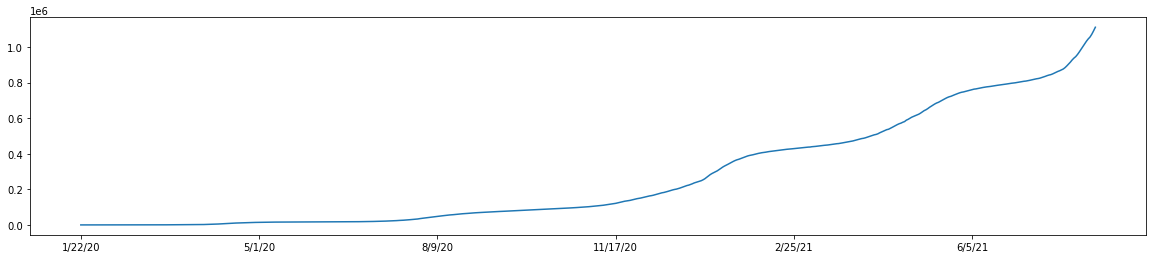

In [9]:
# Let's see data from Japan.
covid_confirmed_df.loc['Japan'].plot(figsize=(20, 4))

In [10]:
# Changing from cumulative cases to daily cases. 
covid_confirmed_df = covid_confirmed_df.diff(periods=1, axis=1)
# Deleting NaN data.
covid_confirmed_df.drop('1/22/20', inplace=True, axis=1)

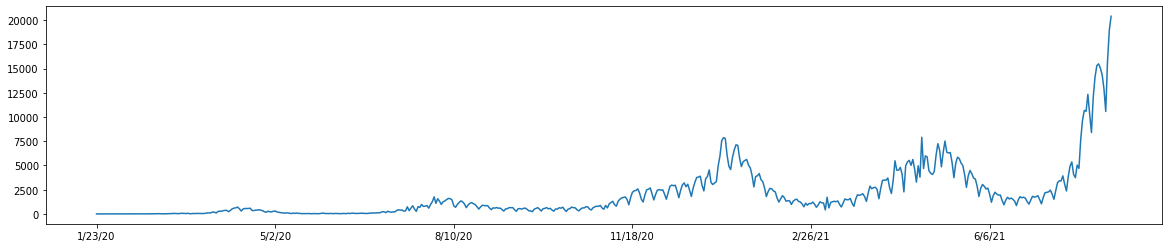

In [11]:
covid_confirmed_df.loc['Japan'].plot(figsize=(20, 4))

In [12]:
# Countries with days where reported negative number of cases.
covid_confirmed_df[(covid_confirmed_df < 0).any(axis=1)]

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,8.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,8.0,9.0,8.0,0.0,10.0,10.0,0.0,24.0,0.0,0.0
Benin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0,0.0,0.0,0.0,0.0,0.0,457.0,0.0,0.0,0.0
China,95.0,277.0,486.0,669.0,802.0,2632.0,578.0,2054.0,1661.0,2089.0,4739.0,3086.0,3991.0,3733.0,3147.0,3523.0,2704.0,3015.0,2525.0,2032.0,373.0,15136.0,6463.0,2055.0,2100.0,1921.0,1777.0,408.0,458.0,473.0,1451.0,21.0,219.0,513.0,412.0,434.0,328.0,428.0,576.0,204.0,...,24.0,58.0,18.0,26.0,27.0,1.0,52.0,29.0,25.0,31.0,36.0,31.0,33.0,33.0,65.0,7.0,78.0,49.0,74.0,-1.0,80.0,71.0,87.0,50.0,68.0,55.0,77.0,99.0,93.0,104.0,87.0,130.0,109.0,103.0,127.0,145.0,115.0,82.0,104.0,71.0
Cote d'Ivoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,54.0,59.0,46.0,37.0,0.0,0.0,93.0,34.0,56.0,40.0,70.0,56.0,71.0,23.0,69.0,0.0,98.0,87.0,81.0,38.0,55.0,52.0,76.0,136.0,93.0,131.0,143.0,63.0,158.0,151.0,243.0,135.0,170.0,182.0,19.0,149.0,184.0,194.0,210.0
Cyprus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,787.0,827.0,952.0,993.0,882.0,960.0,849.0,832.0,1081.0,1120.0,1152.0,953.0,928.0,858.0,1056.0,995.0,1014.0,1046.0,895.0,789.0,727.0,851.0,791.0,769.0,655.0,635.0,0.0,804.0,493.0,598.0,575.0,580.0,525.0,599.0,389.0,446.0,573.0,484.0,402.0,419.0
Czechia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,105.0,130.0,107.0,342.0,272.0,291.0,169.0,145.0,249.0,328.0,275.0,235.0,240.0,204.0,118.0,227.0,313.0,248.0,207.0,200.0,69.0,138.0,217.0,253.0,202.0,210.0,147.0,118.0,75.0,157.0,257.0,227.0,167.0,149.0,180.0,104.0,169.0,271.0,225.0,193.0
Denmark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,341.0,551.0,699.0,672.0,559.0,541.0,635.0,860.0,1075.0,1210.0,1148.0,973.0,1040.0,651.0,855.0,830.0,859.0,815.0,708.0,765.0,647.0,772.0,568.0,1301.0,857.0,1088.0,741.0,898.0,785.0,820.0,932.0,948.0,874.0,954.0,828.0,942.0,1009.0,1176.0,1105.0,1056.0
Ecuador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,507.0,1302.0,1078.0,849.0,1195.0,903.0,370.0,68.0,2468.0,875.0,965.0,925.0,1568.0,850.0,247.0,1634.0,669.0,1169.0,936.0,0.0,0.0,0.0,0.0,0.0,4953.0,871.0,828.0,226.0,0.0,104.0,1387.0,1267.0,829.0,0.0,646.0,0.0,0.0,0.0,1936.0,0.0
El Salvador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

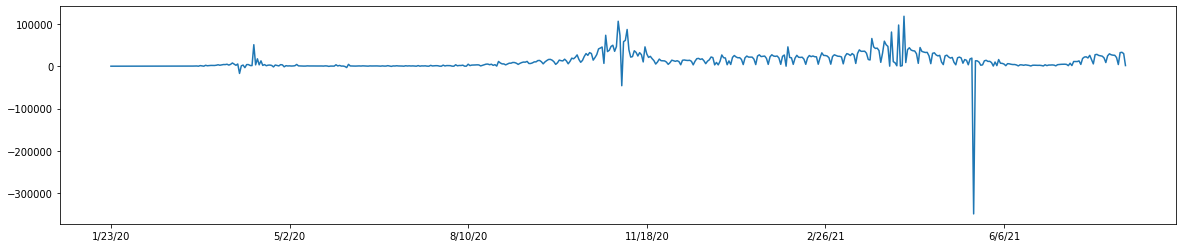

In [13]:
# Let's check for France.
covid_confirmed_df.loc['France'].plot(figsize=(20, 4))

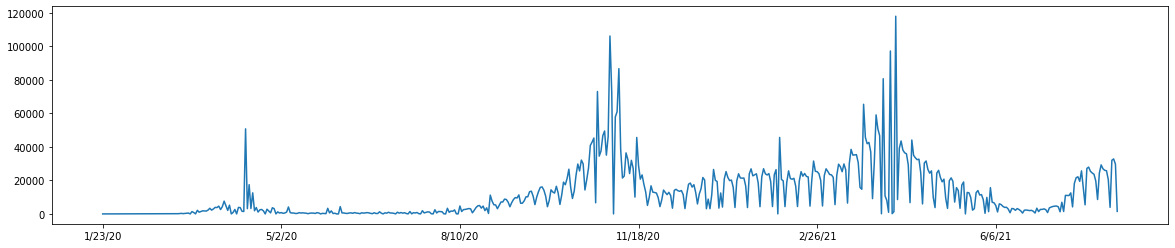

In [14]:
# Replacing negative data with 0.
covid_confirmed_df[(covid_confirmed_df < 0)] = 0
covid_confirmed_df.loc['France'].plot(figsize=(20, 4))

In [15]:
# Smoothing out data.
covid_confirmed_df =  covid_confirmed_df.ewm(span=7, adjust=False, axis=1).mean()

In [16]:
covid_confirmed_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
covid_confirmed_df

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.187500,0.140625,0.105469,0.079102,0.059326,0.044495,0.033371,...,1954.533600,1847.650200,1774.987650,1604.240737,1571.430553,1178.572915,883.929686,1429.697265,1072.272948,1301.704711,1278.778533,959.083900,719.312925,539.484694,1313.613520,1216.460140,912.345105,876.508829,721.381622,541.036216,405.777162,515.832872,567.624654,561.718490,532.288868,530.966651,398.224988,298.668741,589.501556,588.876167,531.907125,505.930344,491.697758,368.773318,276.579989,449.434992,395.826244,366.369683,342.777262,308.832947
Albania,0.0,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.138997,4.104248,6.328186,6.746139,8.809604,8.357203,7.517903,6.888427,7.916320,7.937240,9.202930,11.402198,13.051648,15.038736,14.029052,21.271789,21.703842,24.777881,26.333411,26.000058,25.000044,22.750033,24.812525,26.109393,31.332045,32.749034,35.811775,36.858832,33.894124,41.670593,56.002945,75.002208,93.501656,104.876242,124.157182,110.367886,137.775915,174.831936,199.623952,244.467964
Algeria,0.0,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.187500,0.140625,0.105469,0.079102,0.059326,0.544495,...,449.900110,457.675082,489.506312,522.129734,599.347300,652.760475,681.570356,730.677767,783.258325,815.943744,889.207808,966.155856,1001.366892,1025.775169,1063.581377,1122.186033,1146.889524,1162.167143,1209.125357,1233.094018,1246.570514,1311.177885,1369.383414,1508.787560,1515.840670,1517.130503,1438.597877,1371.948408,1368.461306,1353.095979,1388.571985,1363.678988,1323.509241,1277.631931,1213.223948,1157.917961,1113.188471,1045.891353,997.168515,962.876386
Andorra,0.0,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,...,2.326095,19.994571,22.495928,24.121946,24.341460,18.256095,13.692071,30.269053,25.701790,19.276342,32.457257,32.842943,24.632207,18.474155,35.355616,31.516712,23.637534,38.978151,37.733613,28.300210,21.225157,35.668868,29.001651,21.751238,33.563429,30.922572,23.191929,17.393946,30.295460,27.471595,28.353696,24.265272,24.948954,18.711716,14.033787,10.525340,17.144005,17.358004,17.268503,16.951377
Angola,0.0,0.0,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## Renormalizing confirmed cases and deaths.

In [18]:
covid_confirmed_df.drop(index='Diamond Princess', inplace=True)
covid_confirmed_df.drop(index='Summer Olympics 2020', inplace=True)
covid_confirmed_df.drop(index='Holy See', inplace=True)
covid_confirmed_df.drop(index='West Bank and Gaza', inplace=True)
covid_confirmed_df.drop(index='Palau', inplace=True)
covid_confirmed_df.drop(index='MS Zaandam', inplace=True)

In [19]:
# population_data = {'Afghanistan': 37172386, 'Albania': 2866376, 'Algeria': 42228429, 'American Samoa': 55465, 'Andorra': 77006, 'Angola': 30809762, 'Anguilla': 15094, 'Antarctica': 1106, 'Antigua and Barbuda': 96286, 'Argentina': 44494502, 'Armenia': 2951776, 'Aruba': 105845, 'Australia': 24982688, 'Austria': 8840521, 'Azerbaijan': 9939800, 'Bahamas': 385640, 'Bahrain': 1569439, 'Bangladesh': 161356039, 'Barbados': 286641, 'Belarus': 9483499, 'Belgium': 11433256, 'Belize': 383071, 'Benin': 11485048, 'Bermuda': 63973, 'Bhutan': 754394, 'Bolivia': 11353142, 'Bosnia and Herzegovina': 3323929, 'Botswana': 2254126, 'Bouvet Island': 0, 'Brazil': 209469333, 'British Indian Ocean Territory': 0, 'Brunei': 428962, 'Bulgaria': 7025037, 'Burkina Faso': 19751535, 'Burundi': 11175378, 'Cambodia': 16249798, 'Cameroon': 25216237, 'Canada': 37057765, 'Cabo Verde': 543767, 'Cayman Islands': 64174, 'Central African Republic': 4666377, 'Chad': 15477751, 'Chile': 18729160, 'China': 1392730000, 'Christmas Island': 1402, 'Cocos (Keeling) Islands': 596, 'Colombia': 49648685, 'Comoros': 832322, 'Congo (Brazzaville)': 5244363, 'Cook Islands': 17379, 'Costa Rica': 4999441, 'Croatia': 4087843, 'Cuba': 11338138, 'Cyprus': 1189265, 'Czechia': 10629928, 'Denmark': 5793636, 'Djibouti': 958920, 'Dominica': 71625, 'Dominican Republic': 10627165, 'Timor-Leste': 1267972, 'Ecuador': 17084357, 'Egypt': 98423595, 'El Salvador': 6420744, 'England': 55619400, 'Equatorial Guinea': 1308974, 'Eritrea': 6213972, 'Estonia': 1321977, 'Ethiopia': 109224559, 'Falkland Islands': 2840, 'Faroe Islands': 48497, 'Fiji': 883483, 'Finland': 5515525, 'France': 66977107, 'French Guiana': 290691, 'French Polynesia': 277679, 'French Southern territories': 0, 'Gabon': 2119275, 'Gambia': 2280102, 'Georgia': 3726549, 'Germany': 82905782, 'Ghana': 29767108, 'Gibraltar': 33718, 'Greece': 10731726, 'Greenland': 56025, 'Grenada': 111454, 'Guadeloupe': 395700, 'Guam': 165768, 'Guatemala': 17247807, 'Guinea': 12414318, 'Guinea-Bissau': 1874309, 'Guyana': 779004, 'Haiti': 11123176, 'Heard Island and McDonald Islands': 0, 'Holy See (Vatican City State)': 825, 'Honduras': 9587522, 'Hong Kong': 7451000, 'Hungary': 9775564, 'Iceland': 352721, 'India': 1352617328, 'Indonesia': 267663435, 'Iran': 81800269, 'Iraq': 38433600, 'Ireland': 4867309, 'Israel': 8882800, 'Italy': 60421760, "Cote d'Ivoire": 25069229, 'Jamaica': 2934855, 'Japan': 126529100, 'Jordan': 9956011, 'Kazakhstan': 18272430, 'Kenya': 51393010, 'Kiribati': 115847, 'Kosovo': 1935259,  'Kuwait': 4137309, 'Kyrgyzstan': 6322800, 'Laos': 7061507, 'Latvia': 1927174, 'Lebanon': 6848925, 'Lesotho': 2108132, 'Liberia': 4818977, 'Libya': 6678567, 'Liechtenstein': 37910, 'Lithuania': 2801543, 'Luxembourg': 607950, 'Macao': 631636, 'Madagascar': 26262368, 'Malawi': 18143315, 'Malaysia': 31528585, 'Maldives': 515696, 'Mali': 19077690, 'Malta': 484630, 'Marshall Islands': 58413, 'Martinique': 376480, 'Mauritania': 4403319, 'Mauritius': 1265303, 'Mayotte': 270372, 'Mexico': 126190788, 'Micronesia': 112640, 'Moldova': 2706049, 'Monaco': 38682, 'Mongolia': 3170208, 'Montenegro': 631219, 'Montserrat': 5900, 'Morocco': 36029138, 'Mozambique': 29495962, 'Burma': 53708395, 'Namibia': 2448255, 'Nauru': 12704, 'Nepal': 28087871, 'Netherlands': 17231624, 'Netherlands Antilles': 227049, 'New Caledonia': 284060, 'New Zealand': 4841000, 'Nicaragua': 6465513, 'Niger': 22442948, 'Nigeria': 195874740, 'Niue': 1624, 'Norfolk Island': 2169, 'North Korea': 25549819, 'North Macedonia': 2084367, 'Northern Ireland': 1885400, 'Northern Mariana Islands': 56882, 'Norway': 5311916, 'Oman': 4829483, 'Pakistan': 212215030, 'Palau': 17907, 'Palestine': 4569087, 'Panama': 4176873, 'Papua New Guinea': 8606316, 'Paraguay': 6956071, 'Peru': 31989256, 'Philippines': 106651922, 'Pitcairn': 67, 'Poland': 37974750, 'Portugal': 10283822, 'Puerto Rico': 3195153, 'Qatar': 2781677, 'Reunion': 859959, 'Romania': 19466145, 'Russia': 144478050, 'Rwanda': 12301939, 'Saint Helena': 6600, 'Saint Kitts and Nevis': 52441, 'Saint Lucia': 181889, 'Saint Pierre and Miquelon': 5888, 'Saint Vincent and the Grenadines': 110210, 'Samoa': 196130, 'San Marino': 33785, 'Sao Tome and Principe': 211028, 'Saudi Arabia': 33699947, 'Scotland': 5424800, 'Senegal': 15854360, 'Serbia': 6963764, 'Seychelles': 96762, 'Sierra Leone': 7650154, 'Singapore': 5638676, 'Slovakia': 5446771, 'Slovenia': 2073894, 'Solomon Islands': 652858, 'Somalia': 15008154, 'South Africa': 57779622, 'South Georgia and the South Sandwich Islands': 30, 'Korea, South': 51606633, 'South Sudan': 10975920, 'Spain': 46796540, 'Sri Lanka': 21670000, 'Sudan': 41801533, 'Suriname': 575991, 'Svalbard and Jan Mayen': 2572, 'Eswatini': 1136191, 'Sweden': 10175214, 'Switzerland': 8513227, 'Syria': 16906283, 'Taiwan*': 23568378, 'Tajikistan': 9100837, 'Tanzania': 56318348, 'Thailand': 69428524, 'Congo (Kinshasa)': 84068091, 'Togo': 7889094, 'Tokelau': 1411, 'Tonga': 103197, 'Trinidad and Tobago': 1389858, 'Tunisia': 11565204, 'Turkey': 82319724, 'Turkmenistan': 5850908, 'Turks and Caicos Islands': 37665, 'Tuvalu': 11508, 'Uganda': 42723139, 'Ukraine': 44622516, 'United Arab Emirates': 9630959, 'United Kingdom': 66460344, 'US': 326687501, 'United States Minor Outlying Islands': 300, 'Uruguay': 3449299, 'Uzbekistan': 32955400, 'Vanuatu': 292680, 'Venezuela': 28870195, 'Vietnam': 95540395, 'Virgin Islands, British': 29802, 'Virgin Islands, U.S.': 106977, 'Wales': 3139000, 'Wallis and Futuna': 15289, 'Western Sahara': 652271, 'Yemen': 28498687, 'Zambia': 17351822, 'Zimbabwe': 14439018}

"""
countries_name = list(covid_confirmed_df.index)

for country in countries_name:
    pop = population_data.get(country, 'Not found')
    if pop == 'Not found':
        print(country)

countries_name = list(covid_confirmed_df.index)

countries_population = []
for country in countries_name:
    countries_population.append(population_data[country])

countries_population_df = pd.DataFrame(data={'Countries population': countries_population}, index=covid_confirmed_df.index)
countries_population_df.index.rename('Country/Region', inplace=True)

print(countries_population_df)

covid_confirmed_df = covid_confirmed_df.divide(countries_population, axis=0)

print(covid_confirmed_df)
"""

"\ncountries_name = list(covid_confirmed_df.index)\n\nfor country in countries_name:\n    pop = population_data.get(country, 'Not found')\n    if pop == 'Not found':\n        print(country)\n\ncountries_name = list(covid_confirmed_df.index)\n\ncountries_population = []\nfor country in countries_name:\n    countries_population.append(population_data[country])\n\ncountries_population_df = pd.DataFrame(data={'Countries population': countries_population}, index=covid_confirmed_df.index)\ncountries_population_df.index.rename('Country/Region', inplace=True)\n\nprint(countries_population_df)\n\ncovid_confirmed_df = covid_confirmed_df.divide(countries_population, axis=0)\n\nprint(covid_confirmed_df)\n"

In [20]:
# Let's take max covid cases for rescaling deaths.
max_covid_confirmed_by_country_df = covid_confirmed_df.max(axis=1) #.to_frame(name='Max covid cases')
max_covid_confirmed_by_country_df.to_csv()

'Country/Region,0\nAfghanistan,2053.7303818886026\nAlbania,1102.8806333115085\nAlgeria,1517.1305027369735\nAndorra,121.21045142279912\nAngola,302.2527452149507\nAntigua and Barbuda,29.019826770260497\nArgentina,34081.824196210175\nArmenia,2228.9045252675933\nAustralia,527.4379484452581\nAustria,7768.44477317818\nAzerbaijan,4272.526374878835\nBahamas,139.98250942899978\nBahrain,2936.951158134119\nBangladesh,14277.819947130256\nBarbados,116.06600948373809\nBelarus,1906.1140189291568\nBelgium,18364.128470013773\nBelize,381.8361496192146\nBenin,165.26239768902497\nBhutan,39.83366026287902\nBolivia,3342.27345551788\nBosnia and Herzegovina,1859.2481608280932\nBotswana,2996.8443443295364\nBrazil,82996.21040365103\nBrunei,39.346868179544714\nBulgaria,3923.982812706346\nBurkina Faso,197.62517204163487\nBurma,5825.393921764397\nBurundi,255.8460122863547\nCabo Verde,313.07697273150814\nCambodia,957.4457115247287\nCameroon,2733.124093003727\nCanada,8877.81748575014\nCentral African Republic,1011.0

In [21]:
covid_confirmed_df = covid_confirmed_df.divide(covid_confirmed_df.max(axis=1), axis=0)

In [22]:
covid_confirmed_df

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000122,0.000091,0.000068,0.000051,0.000039,2.888703e-05,2.166527e-05,1.624895e-05,...,0.951699,0.899656,0.864275,0.781135,0.765159,0.573869,0.430402,0.696147,0.522110,0.633825,0.622661,0.466996,0.350247,0.262685,0.639623,0.592317,0.444238,0.426789,0.351254,0.263441,0.197581,0.251169,0.276387,0.273511,0.259181,0.258538,0.193903,0.145427,0.287039,0.286735,0.258996,0.246347,0.239417,0.179563,0.134672,0.218838,0.192735,0.178392,0.166905,0.150377
Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.002846,0.003721,0.005738,0.006117,0.007988,0.007578,0.006817,0.006246,0.007178,0.007197,0.008344,0.010339,0.011834,0.013636,0.012720,0.019287,0.019679,0.022467,0.023877,0.023575,0.022668,0.020628,0.022498,0.023674,0.028409,0.029694,0.032471,0.033421,0.030732,0.037783,0.050779,0.068006,0.084779,0.095093,0.112575,0.100072,0.124924,0.158523,0.181002,0.221663
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000165,0.000124,0.000093,0.000070,5.213893e-05,3.910420e-05,3.588977e-04,...,0.296547,0.301672,0.322653,0.344156,0.395053,0.430260,0.449250,0.481618,0.516276,0.537820,0.586112,0.636831,0.660040,0.676128,0.701048,0.739677,0.755960,0.766030,0.796982,0.812780,0.821663,0.864249,0.902614,0.994501,0.999150,1.000000,0.948236,0.904305,0.902006,0.891878,0.915262,0.898854,0.872377,0.842137,0.799683,0.763229,0.733746,0.689388,0.657273,0.634669
Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.062528e-03,...,0.019191,0.164957,0.185594,0.199009,0.200820,0.150615,0.112961,0.249723,0.212043,0.159032,0.267776,0.270958,0.203219,0.152414,0.291688,0.260016,0.195012,0.321574,0.311307,0.233480,0.175110,0.294272,0.239267,0.179450,0.276902,0.255115,0.191336,0.143502,0.249941,0.226644,0.233921,0.200191,0.205832,0.154374,0.115780,0.086835,0.141440,0.143206,0.142467,0.139851
Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [23]:
covid_confirmed_df.T.plot(figsize=(20, 400), subplots=True)

Output hidden; open in https://colab.research.google.com to view.

## Let's save the data

In [24]:
# Saving max covid cases to rescale deaths.
max_covid_confirmed_by_country_df.to_csv(r'/content/gdrive/MyDrive/Covid_Project/Data/Processed_Data/max_covid_confirmed_by_country.csv')

In [25]:
# Saving these processed data to CSV.
covid_confirmed_df.to_csv(r'/content/gdrive/MyDrive/Covid_Project/Data/Processed_Data/confirmed_cases_processed.csv')